In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
pd.set_option('max_columns', 500)

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
def list_missing(data, verbose=True):
    mis_cols = [col for col in data.columns if data[col].isna().any()]
    if not verbose:
        return mis_cols
    tot_rows = len(data)
    for col in mis_cols:
        print(f'Column {col}: {round(data[col].isna().sum()*100/tot_rows, 2)}% missing')
    return mis_cols

In [11]:
mis_train = list_missing(df_train)
print('_'*40)
print('\n')
mis_test = list_missing(df_test)

Column LotFrontage: 17.74 missing
Column Alley: 93.77 missing
Column MasVnrType: 0.55 missing
Column MasVnrArea: 0.55 missing
Column BsmtQual: 2.53 missing
Column BsmtCond: 2.53 missing
Column BsmtExposure: 2.6 missing
Column BsmtFinType1: 2.53 missing
Column BsmtFinType2: 2.6 missing
Column Electrical: 0.07 missing
Column FireplaceQu: 47.26 missing
Column GarageType: 5.55 missing
Column GarageYrBlt: 5.55 missing
Column GarageFinish: 5.55 missing
Column GarageQual: 5.55 missing
Column GarageCond: 5.55 missing
Column PoolQC: 99.52 missing
Column Fence: 80.75 missing
Column MiscFeature: 96.3 missing
________________________________________


Column MSZoning: 0.27 missing
Column LotFrontage: 15.56 missing
Column Alley: 92.67 missing
Column Utilities: 0.14 missing
Column Exterior1st: 0.07 missing
Column Exterior2nd: 0.07 missing
Column MasVnrType: 1.1 missing
Column MasVnrArea: 1.03 missing
Column BsmtQual: 3.02 missing
Column BsmtCond: 3.08 missing
Column BsmtExposure: 3.02 missing
Column

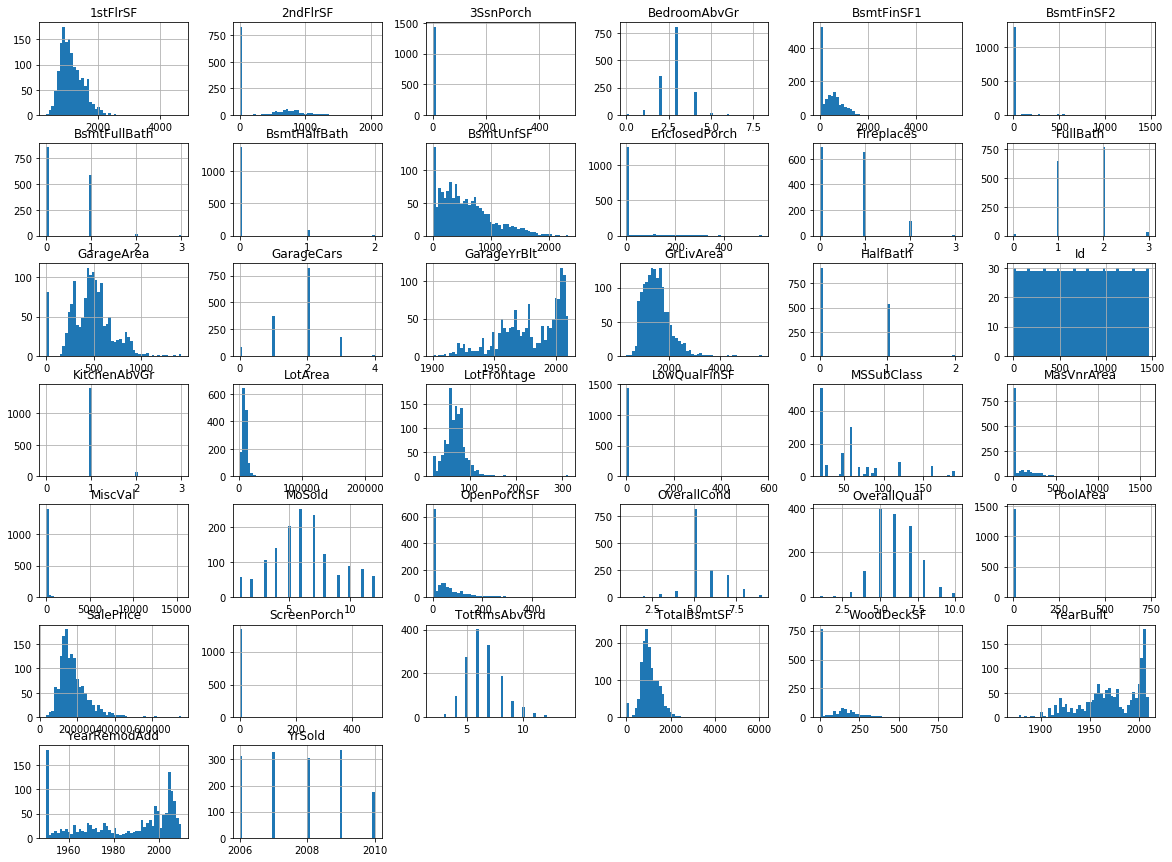

In [13]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
def make_test(train, test_size, random_state, strat_feat=None):
    if strat_feat:
        
        split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)

        for train_index, test_index in split.split(train, train[strat_feat]):
            train_set = train.loc[train_index]
            test_set = train.loc[test_index]
            
    return train_set, test_set

In [15]:
train_set, test_set = make_test(df_train, 
                                test_size=0.2, random_state=654, 
                                strat_feat='Neighborhood')

* Correlation with target
* Univariate
* Bivariate
* Bivariate + category
* Missing values

In [53]:
def plot_correlations(data, target=None, limit=50, figsize=(12,10), **kwargs):
    corr = data.corr()
    if target:
        cor_target = abs(corr[target]).sort_values(ascending=False)
        cor_target = cor_target[:limit]
        corr = corr.loc[cor_target.index, cor_target.index]
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap='RdBu_r', **kwargs)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return cor_target

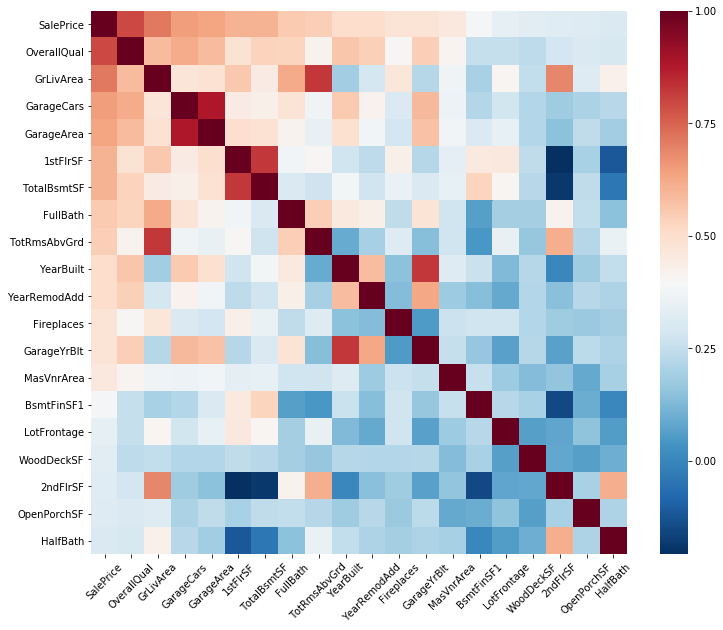

In [55]:
high_corr = plot_correlations(train_set, 'SalePrice', limit=20)

In [86]:
def plot_distribution(data, column, bins=50, correlation=None):
    plt.figure(figsize=(12,8))
    data[column].hist(bins=bins)
    if not correlation is None:
        value = correlation[column]
        column = column + f' - {round(value,2)}'
    plt.title(f'Distribution of {column}', fontsize=18)
    plt.grid(False)

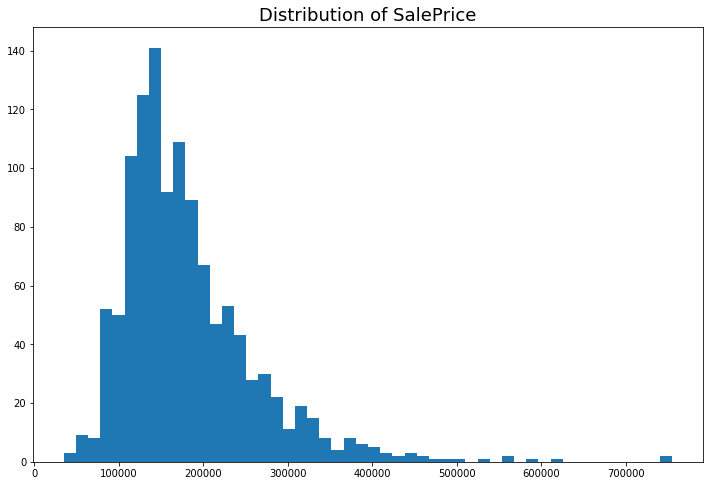

In [87]:
plot_distribution(train_set, 'SalePrice')

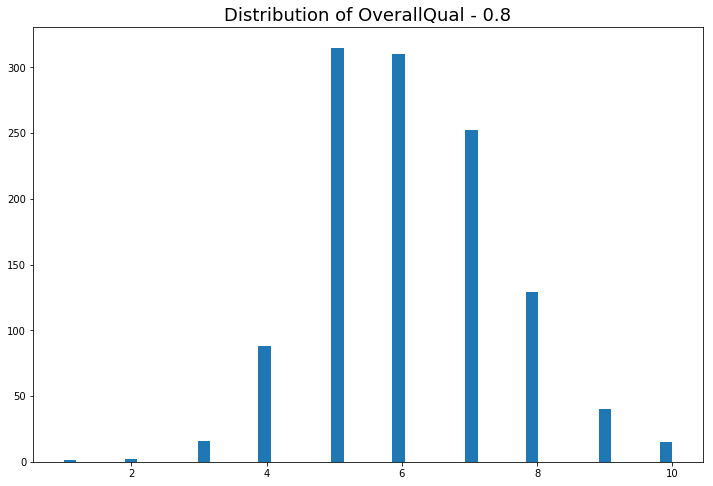

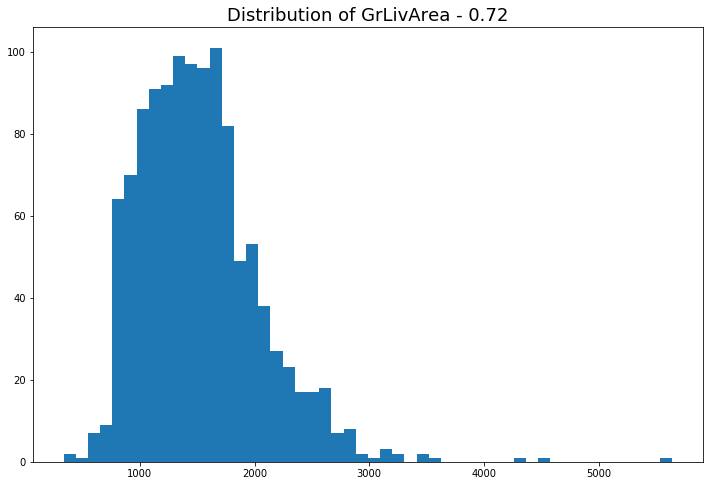

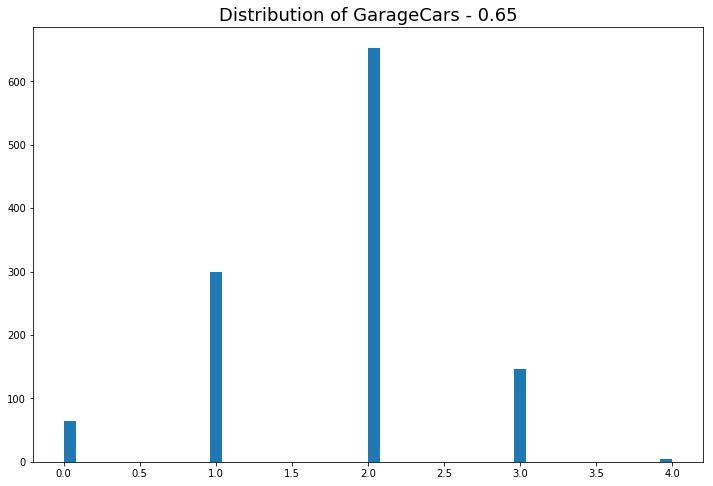

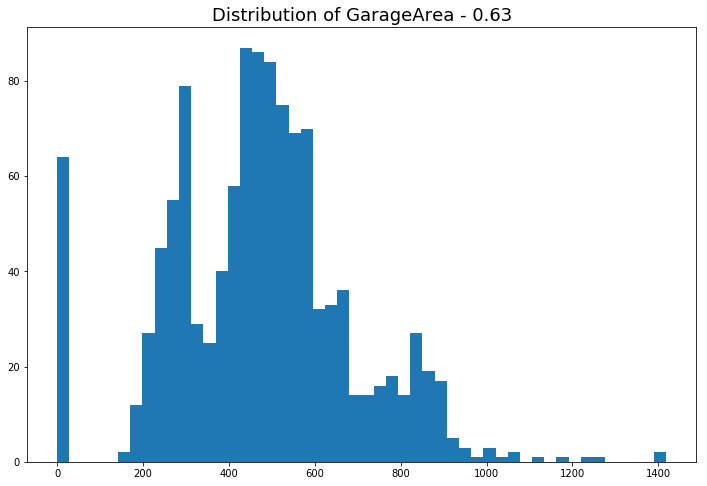

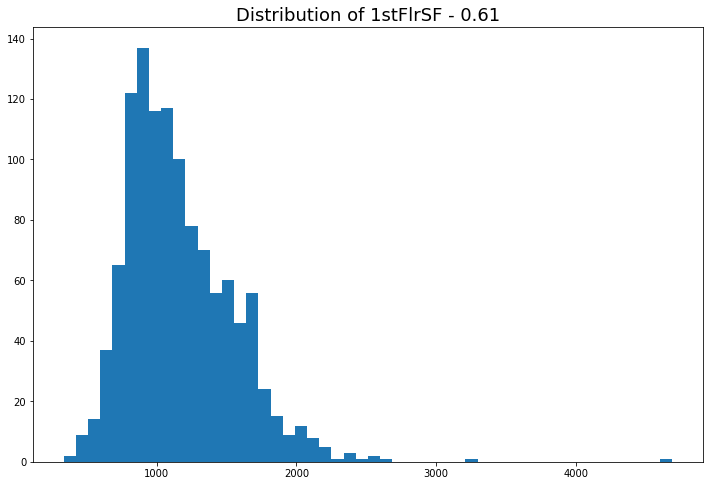

In [90]:
for col in high_corr[1:6].index:
    plot_distribution(train_set, col, correlation=high_corr)

In [95]:
def plot_bivariate(data, x, y, hue=None, **kwargs):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, **kwargs)
    if hue:
        plt.title(f'{x} vs {y}, by {hue}', fontsize=18)
    else:
        plt.title(f'{x} vs {y}', fontsize=18)

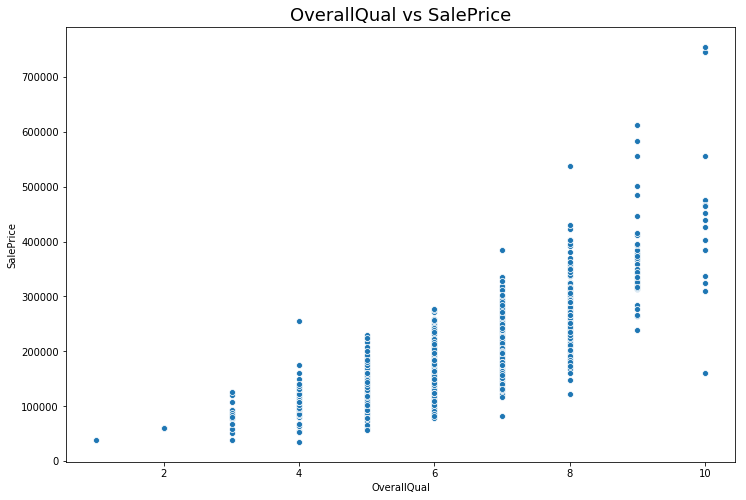

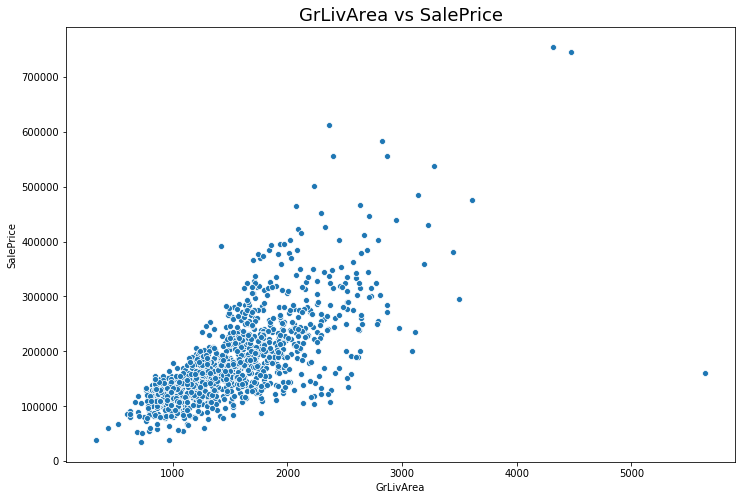

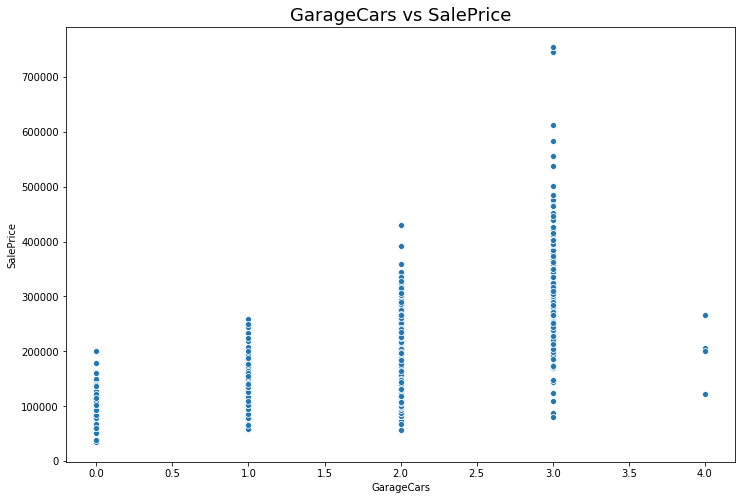

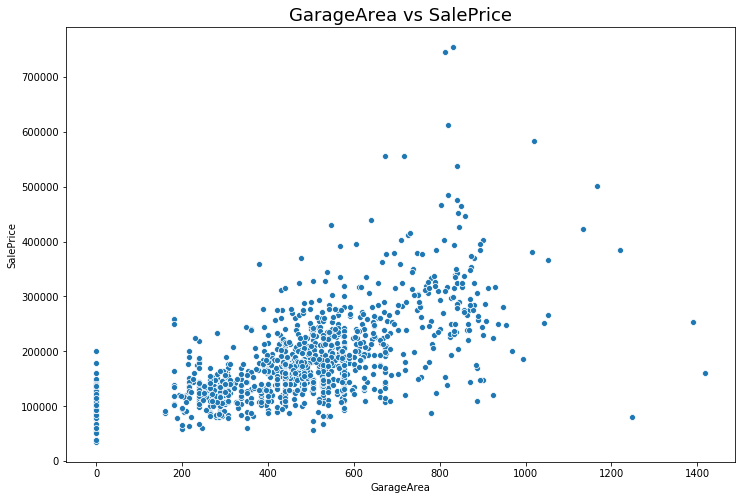

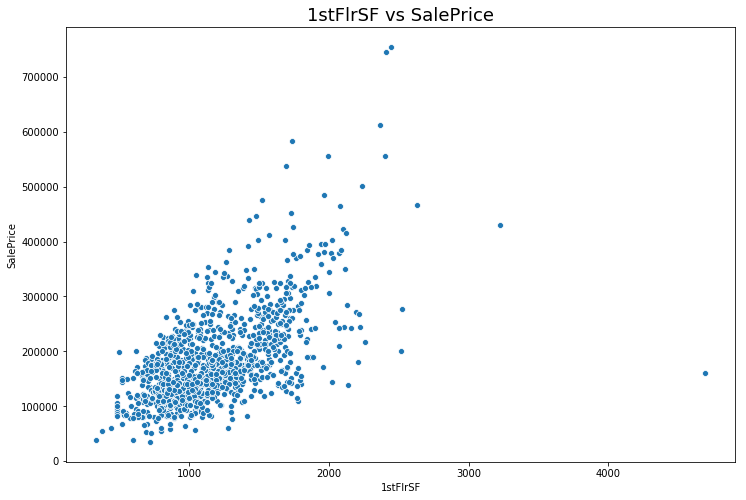

In [97]:
for col in high_corr[1:6].index:
    plot_bivariate(train_set, x=col, y='SalePrice')

In [253]:
def corr_target(data, target, cols, x_estimator=None):
    print(data[cols+[target]].corr())
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    cols = list(cols)
    y = data[target]
    fig, ax = plt.subplots(rows, 2, figsize=(12, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        x = data[feat]
        if (rows > 1):
            sns.regplot(x=x, y=y, ax=ax[i][j], x_estimator=x_estimator)
            j = (j+1)%2
            i = i + 1 - j
        else:
            sns.regplot(x=x, y=y, ax=ax[i], x_estimator=x_estimator)
            i = i+1

             OverallQual  GrLivArea  GarageCars  GarageArea  1stFlrSF  \
OverallQual     1.000000   0.589283    0.620468    0.586770  0.480899   
GrLivArea       0.589283   1.000000    0.471887    0.485531  0.559345   
GarageCars      0.620468   0.471887    1.000000    0.883450  0.444270   
GarageArea      0.586770   0.485531    0.883450    1.000000  0.498584   
1stFlrSF        0.480899   0.559345    0.444270    0.498584  1.000000   
SalePrice       0.796498   0.715205    0.649694    0.634377  0.607601   

             SalePrice  
OverallQual   0.796498  
GrLivArea     0.715205  
GarageCars    0.649694  
GarageArea    0.634377  
1stFlrSF      0.607601  
SalePrice     1.000000  


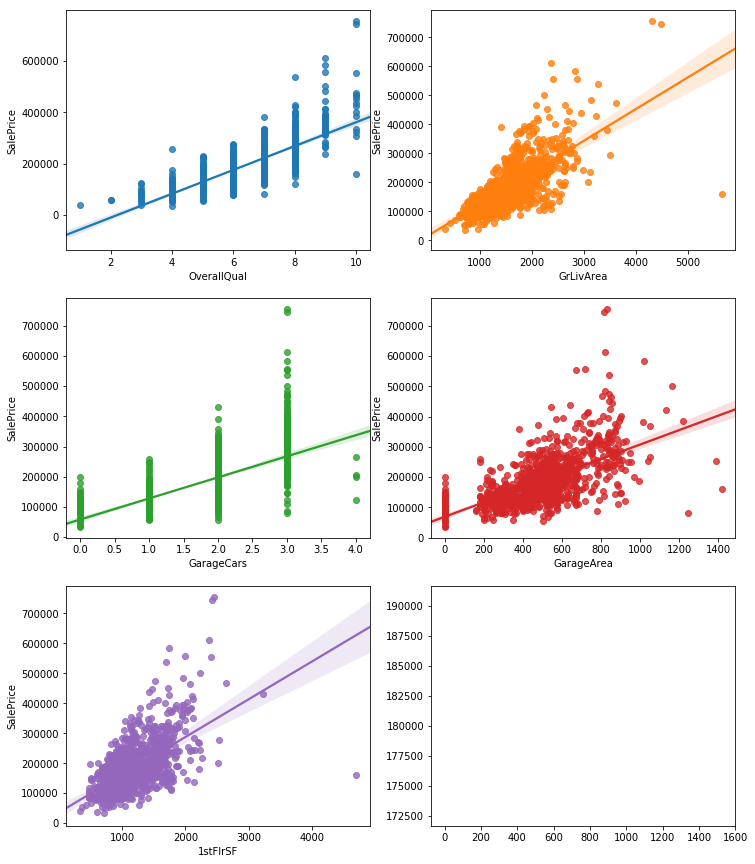

In [256]:
corr_target(train_set, 'SalePrice', list(high_corr[1:6].index))

             OverallQual  GarageCars  SalePrice
OverallQual     1.000000    0.620468   0.796498
GarageCars      0.620468    1.000000   0.649694
SalePrice       0.796498    0.649694   1.000000


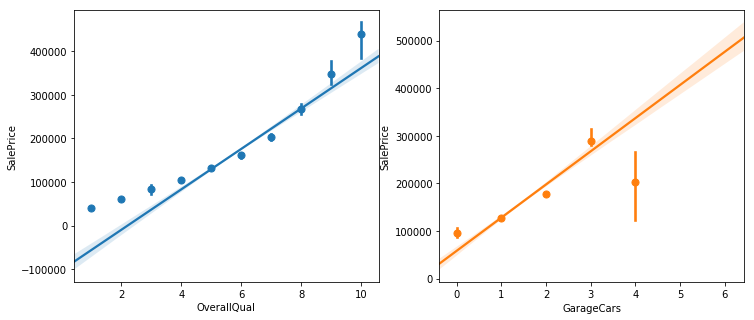

In [258]:
corr_target(train_set, 'SalePrice', 
            [col for col in high_corr.index if 'Qual' in col or 'Car' in col], 
            x_estimator=np.median)

              OverallQual  YearBuilt  YearRemodAdd  LowQualFinSF  GarageCars  \
OverallQual      1.000000   0.561674      0.542059     -0.035899    0.620468   
YearBuilt        0.561674   1.000000      0.583499     -0.175861    0.552082   
YearRemodAdd     0.542059   0.583499      1.000000     -0.082520    0.423900   
LowQualFinSF    -0.035899  -0.175861     -0.082520      1.000000   -0.090599   
GarageCars       0.620468   0.552082      0.423900     -0.090599    1.000000   
YrSold          -0.036103  -0.020685      0.025527     -0.043664   -0.037211   
SalePrice        0.796498   0.508482      0.507636     -0.025302    0.649694   

                YrSold  SalePrice  
OverallQual  -0.036103   0.796498  
YearBuilt    -0.020685   0.508482  
YearRemodAdd  0.025527   0.507636  
LowQualFinSF -0.043664  -0.025302  
GarageCars   -0.037211   0.649694  
YrSold        1.000000  -0.038393  
SalePrice    -0.038393   1.000000  


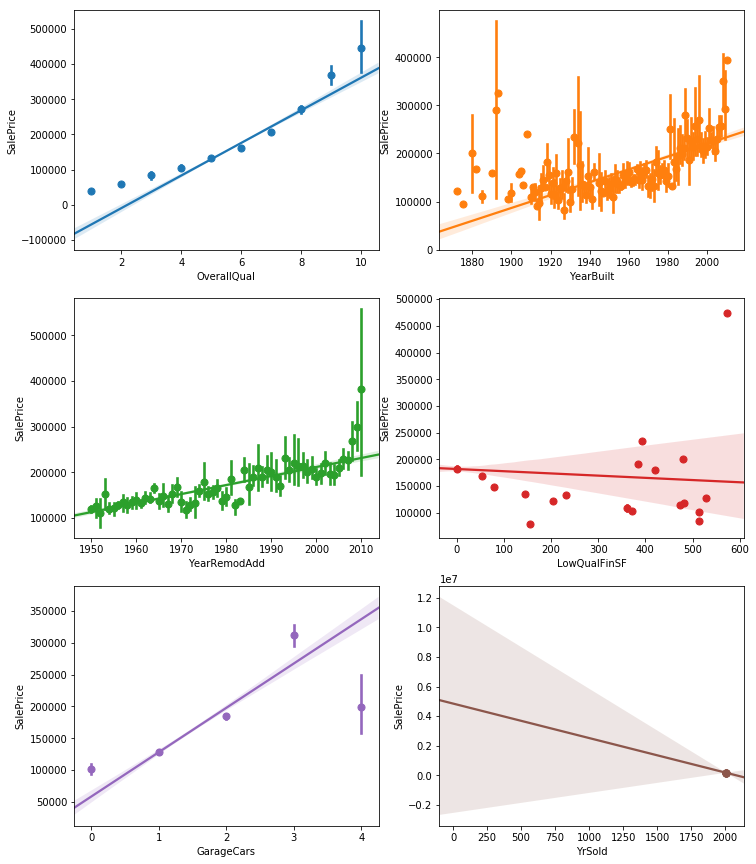

In [263]:
corr_target(train_set, 'SalePrice', 
            [col for col in train_set.select_dtypes(include=['int64']).columns if 
             'Yr' in col or 'Cars' in col or 'Qual' in col or 'Year' in col], 
            x_estimator=np.mean)

# Categorical features

In [101]:
cats = list(train_set.select_dtypes(include=['object']).columns)
cats = train_set[['SalePrice']+cats]

cats

,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
68,80000,RM,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1097,170000,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
219,167240,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
901,153000,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,Mn,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
505,124500,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,Duplex,2Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,COD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,140000,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Min2,NaN,BuiltIn,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1308,147000,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,GLQ,ALQ,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
563,185000,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Fin,TA,TA,N,NaN,NaN,NaN,WD,Normal
411,145000,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,Mn,Rec,Unf,GasA,TA,N,SBrkr,TA,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [244]:
def find_cats(data, target, thrs=0.1, agg_func='mean', frac=1):
    cats = []
    tar_std = data[target].std()
    for col in data.select_dtypes(include=['object']).columns:
        counts = data[col].value_counts(dropna=False, 
                                        normalize=True)
        tmp = data.loc[data[col].isin(counts[counts > thrs].index), 
                       :].groupby(col)[target].agg(agg_func).std()
        if tmp >= tar_std*frac:
            cats.append(col)
    return cats

In [137]:
find_cats(train_set, 'SalePrice', thrs=0)

['Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual', 'KitchenQual', 'PoolQC']

In [133]:
find_cats(train_set, 'SalePrice', thrs=0.05, agg_func='mean')

['BsmtQual', 'KitchenQual']

In [252]:
find_cats(train_set, 'SalePrice', thrs=0.1, frac=0.5)

['MSZoning',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [185]:
def segm_target(data, cat, target):
    df = data.groupby(cat)[target].agg(['count', 'mean', 'max', 
                                        'min', 'median', 'std'])
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    sns.boxplot(cat, target, data=data, ax=ax[0])
    for val in data[cat].unique():
        tmp = data[data[cat] == val]
        sns.distplot(tmp[target], hist=False, kde=True,
                 kde_kws = {'linewidth': 3, 'alpha': 0.7},
                 label = val, ax=ax[1])  
    return df

/home/lucabasa/.local/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/lucabasa/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
BsmtQual,,,,,,
Ex,96,328778.416667,755000,123500,319950,117092.790577
Fa,22,128013.636364,206900,73000,124750,34537.133852
Gd,496,203865.125000,538000,80000,194500,58101.955955
TA,524,140313.730916,475000,34900,135000,45011.826496


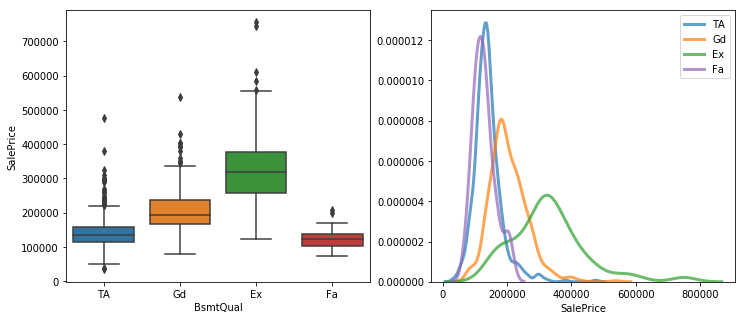

In [186]:
segm_target(train_set, 'BsmtQual', 'SalePrice')

,count,mean,max,min,median,std
KitchenQual,,,,,,
Ex,84,337855.130952,755000,92000,322500,124305.129245
Fa,32,101431.031250,174500,39300,104750,33574.993015
Gd,465,211515.707527,438780,79000,203000,59916.058639
TA,587,140060.173765,359100,34900,136500,38539.583792


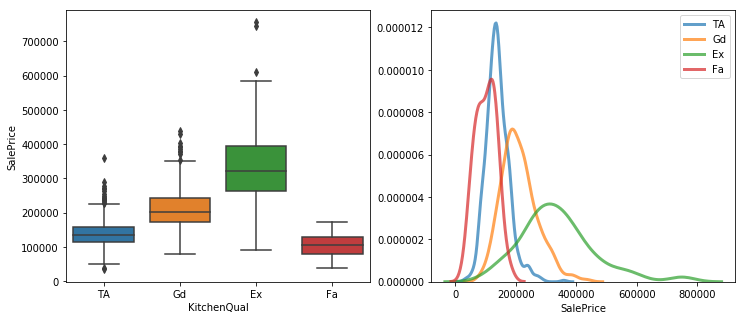

In [187]:
segm_target(train_set, 'KitchenQual', 'SalePrice')

,count,mean,max,min,median,std
LotShape,,,,,,
IR1,371,210800.283019,755000,52000,191000,86606.769365
IR2,35,242040.400000,538000,145000,222000,98303.829084
IR3,8,196295.625000,274725,73000,186570,68585.792023
Reg,754,164386.029178,582933,34900,145000,70410.333404


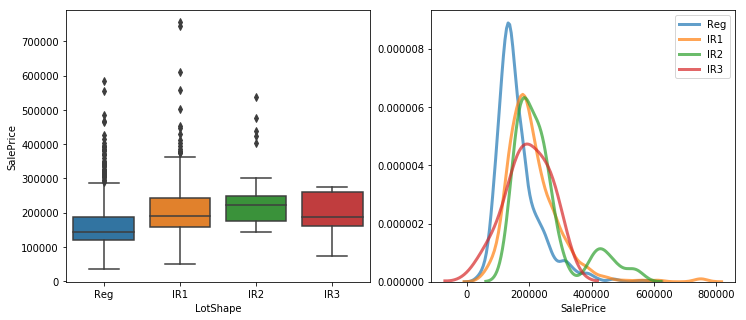

In [189]:
segm_target(train_set, cats.columns[4], 'SalePrice')

,count,mean,max,min,median,std
LandContour,,,,,,
Bnk,54,144012.703704,315000,52500,140000,51160.701811
HLS,41,237507.243902,538000,82500,228950,104969.832133
Low,27,206511.111111,385000,39300,224000,84629.033631
Lvl,1046,180789.165392,755000,34900,164250,79180.154676


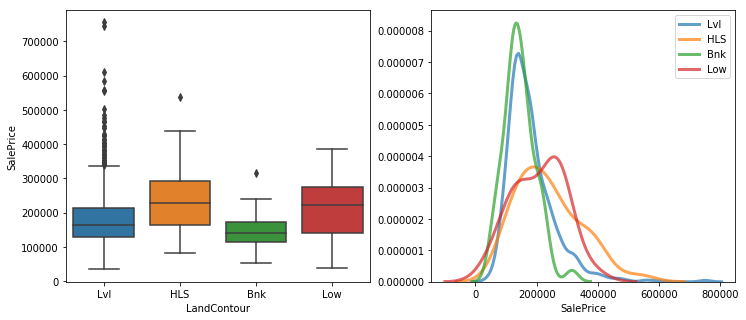

In [190]:
segm_target(train_set, cats.columns[5], 'SalePrice')

,count,mean,max,min,median,std
HouseStyle,,,,,,
1.5Fin,121,144381.371901,381000,37900,133000,54210.112513
1.5Unf,10,108220.000000,132000,87000,109250,15033.503325
1Story,575,175695.306087,611657,34900,154000,77923.854262
2.5Fin,6,227166.666667,475000,104000,185250,138982.972578
2.5Unf,8,159487.500000,325000,101000,131700,75499.866367
2Story,368,210291.809783,755000,55000,190000,87644.113317
SFoyer,31,138203.129032,206300,80000,137000,30877.891803
SLvl,49,169551.428571,345000,91000,167500,42963.175560


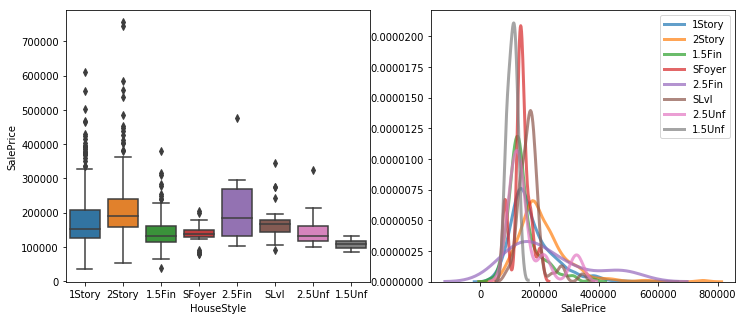

In [197]:
segm_target(train_set, cats.columns[13], 'SalePrice')

,count,mean,max,min,median,std
ExterQual,,,,,,
Ex,43,375351.790698,755000,160000,367294,121851.479425
Fa,11,78253.909091,122000,39300,82000,24121.647707
Gd,391,231633.557545,745000,52000,223000,70083.975272
TA,723,144711.077455,381000,34900,140000,42429.994349


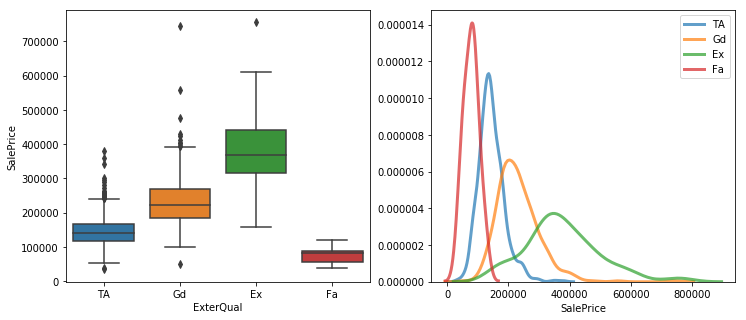

In [203]:
segm_target(train_set, cats.columns[19], 'SalePrice')

/home/lucabasa/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lucabasa/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
HeatingQC,,,,,,
Ex,594,216056.122896,755000,66500,197000,88604.675716
Fa,39,117412.948718,230000,37900,121000,48039.298191
Gd,191,158766.335079,395000,52000,152000,53420.245040
Po,1,87000.000000,87000,87000,87000,NaN
TA,343,142472.122449,359100,34900,135000,46960.854765


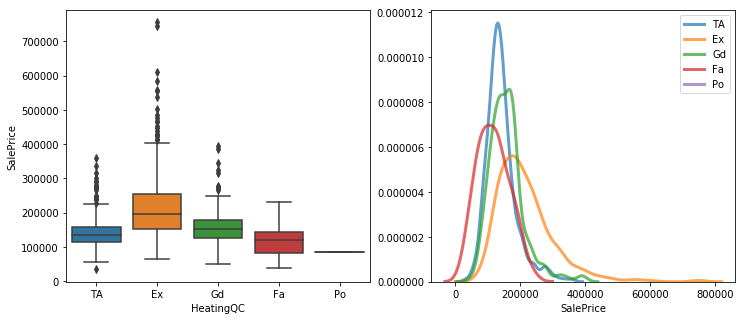

In [215]:
segm_target(train_set, cats.columns[28], 'SalePrice')

/home/lucabasa/.local/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/lucabasa/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
GarageFinish,,,,,,
Fin,284,239591.690141,755000,82500,215000,99559.198013
RFn,336,201651.580357,582933,68400,190000,63284.378340
Unf,484,144501.299587,475000,55993,135000,48811.360487


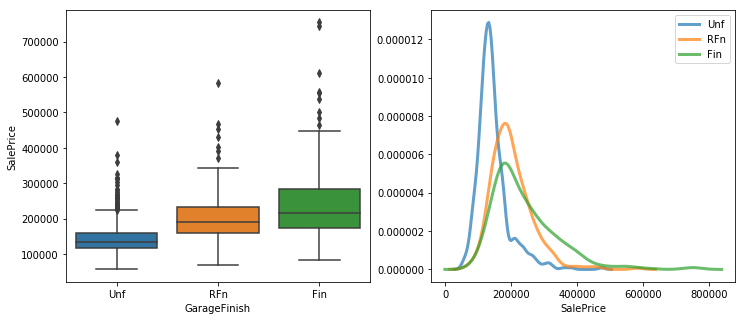

In [223]:
segm_target(train_set, cats.columns[35], 'SalePrice')

In [232]:
n+=1
print(n)
segm_target(train_set, cats.columns[n], 'SalePrice')

44


IndexError: index 44 is out of bounds for axis 0 with size 44